In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df=pd.read_csv("D:\\Projects\\Quantium\\QVI_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [4]:
df["DATE"]=pd.to_datetime(df["DATE"])

df['Month_Year'] = df['DATE'].apply(lambda x: x.strftime('%Y%m'))

In [5]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Month_Year
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


In [6]:
df_metrics=df.groupby(["STORE_NBR","Month_Year"]).agg({'TOT_SALES':'sum','LYLTY_CARD_NBR':'nunique','TXN_ID':'nunique','PROD_QTY':'sum'})

In [7]:
df_metrics

TOT_SALES  LYLTY_CARD_NBR  TXN_ID  PROD_QTY
STORE_NBR Month_Year                                             
1         201807          206.9              49      52        62
          201808          176.1              42      43        54
          201809          278.8              59      62        75
          201810          188.1              44      45        58
          201811          192.6              46      47        57
...                         ...             ...     ...       ...
272       201902          395.5              45      48        91
          201903          442.3              50      53       101
          201904          445.1              54      55       105
          201905          314.6              34      40        71
          201906          312.1              34      37        70

[3169 rows x 4 columns]

In [8]:
df_metrics['PRICE_PER_UNIT']=df_metrics['TOT_SALES']/df_metrics['PROD_QTY']
df_metrics['CHIP_PER_TXN']=df_metrics['PROD_QTY']/df_metrics['TXN_ID']
df_metrics=df_metrics.rename(columns={'LYLTY_CARD_NBR':'CUSTOMERS'})
df_metrics["TXN_PER_CUST"]=df_metrics['TXN_ID']/df_metrics['CUSTOMERS']
df_metrics.drop(['TXN_ID'],axis=1,inplace=True)

In [9]:
df_metrics

TOT_SALES  CUSTOMERS  PROD_QTY  PRICE_PER_UNIT   
STORE_NBR Month_Year                                                   
1         201807          206.9         49        62        3.337097  \
          201808          176.1         42        54        3.261111   
          201809          278.8         59        75        3.717333   
          201810          188.1         44        58        3.243103   
          201811          192.6         46        57        3.378947   
...                         ...        ...       ...             ...   
272       201902          395.5         45        91        4.346154   
          201903          442.3         50       101        4.379208   
          201904          445.1         54       105        4.239048   
          201905          314.6         34        71        4.430986   
          201906          312.1         34        70        4.458571   

                      CHIP_PER_TXN  TXN_PER_CUST  
STORE_NBR Month_Year                              
1         201807          1.192308      1.061224  
          201808          1.255814      1.023810  
          201809          1.209677      1.050847  
          201810          1.288889      1.022727  
          201811          1.212766      1.021739  
...                            ...           ...  
272       201902          1.895833      1.066667  
          201903          1.905660      1.060000  
          201904          1.909091      1.018519  
          201905          1.775000      1.176471  
          201906          1.891892      1.088235  

[3169 rows x 6 columns]

In [10]:
# Trial Stores 77 , 86, 88


In [11]:
trial=[]
for i in df_metrics.index:
    year = int(i[1])
    if (year >= 201902):
        if (year <= 201904):
            trial.append(df_metrics.loc[i])
        df_metrics.drop(i,inplace=True)
trial=pd.DataFrame(trial)
trial

TOT_SALES  CUSTOMERS  PROD_QTY  PRICE_PER_UNIT  CHIP_PER_TXN   
1   201902      225.4       52.0      65.0        3.467692      1.181818  \
    201903      192.9       45.0      58.0        3.325862      1.183673   
    201904      192.9       42.0      57.0        3.384211      1.325581   
2   201902      139.4       29.0      37.0        3.767568      1.156250   
    201903      192.1       43.0      51.0        3.766667      1.108696   
...               ...        ...       ...             ...           ...   
271 201903      735.8       79.0     202.0        3.642574      2.000000   
    201904      774.6       87.0     218.0        3.553211      2.000000   
272 201902      395.5       45.0      91.0        4.346154      1.895833   
    201903      442.3       50.0     101.0        4.379208      1.905660   
    201904      445.1       54.0     105.0        4.239048      1.909091   

            TXN_PER_CUST  
1   201902      1.057692  
    201903      1.088889  
    201904      1.023810  
2   201902      1.103448  
    201903      1.069767  
...                  ...  
271 201903      1.278481  
    201904      1.252874  
272 201902      1.066667  
    201903      1.060000  
    201904      1.018519  

[794 rows x 6 columns]

In [12]:
df_metrics.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1848 entries, (1, '201807') to (272, '201901')
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TOT_SALES       1848 non-null   float64
 1   CUSTOMERS       1848 non-null   int64  
 2   PROD_QTY        1848 non-null   int64  
 3   PRICE_PER_UNIT  1848 non-null   float64
 4   CHIP_PER_TXN    1848 non-null   float64
 5   TXN_PER_CUST    1848 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 102.8+ KB


In [13]:
trial.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 794 entries, (1, '201902') to (272, '201904')
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TOT_SALES       794 non-null    float64
 1   CUSTOMERS       794 non-null    float64
 2   PROD_QTY        794 non-null    float64
 3   PRICE_PER_UNIT  794 non-null    float64
 4   CHIP_PER_TXN    794 non-null    float64
 5   TXN_PER_CUST    794 non-null    float64
dtypes: float64(6)
memory usage: 49.9+ KB


In [14]:
#Function to find correlation:

def corrcalc(store):
    
    a=[]
    metrix=df_metrics[["TOT_SALES","CUSTOMERS"]]   
    for i in metrix.index:
        a.append(metrix.loc[store].corrwith(metrix.loc[i[0]]))
    df=pd.DataFrame(a)
    df.index=metrix.index
    df=df.drop_duplicates()
    df.index=[i[0] for i in df.index]
    df.index.name="STORE_NBR"
    return df
        
        

In [15]:
# Function for Standadizer

def standardizer(df):
    df=df.abs()
    df["MAGNITUDE"]=df.mean(axis=1)
    return df

In [16]:
corr77=corrcalc(77)

In [17]:
corr77

,TOT_SALES,CUSTOMERS
STORE_NBR,,
1,0.075218,0.322168
2,-0.263079,-0.572051
3,0.806644,0.834207
4,-0.263300,-0.295639
5,-0.110652,0.370659
...,...,...
268,0.344757,0.369517
269,-0.315730,-0.474293
270,0.315430,-0.131259


In [18]:
corr77=standardizer(corr77)
corr77

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
1,0.075218,0.322168,0.198693
2,0.263079,0.572051,0.417565
3,0.806644,0.834207,0.820426
4,0.263300,0.295639,0.279469
5,0.110652,0.370659,0.240655
...,...,...,...
268,0.344757,0.369517,0.357137
269,0.315730,0.474293,0.395011
270,0.315430,0.131259,0.223345


In [19]:
corr77=corr77.sort_values(["MAGNITUDE"],ascending=False).dropna()

In [20]:
corr77

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
77,1.000000,1.000000,1.000000
233,0.903774,0.990358,0.947066
119,0.867664,0.983267,0.925466
71,0.914106,0.754817,0.834461
3,0.806644,0.834207,0.820426
...,...,...,...
256,0.014245,0.047863,0.031054
159,0.001655,0.054404,0.028030
260,0.016618,0.027446,0.022032


<AxesSubplot:xlabel='STORE_NBR'>

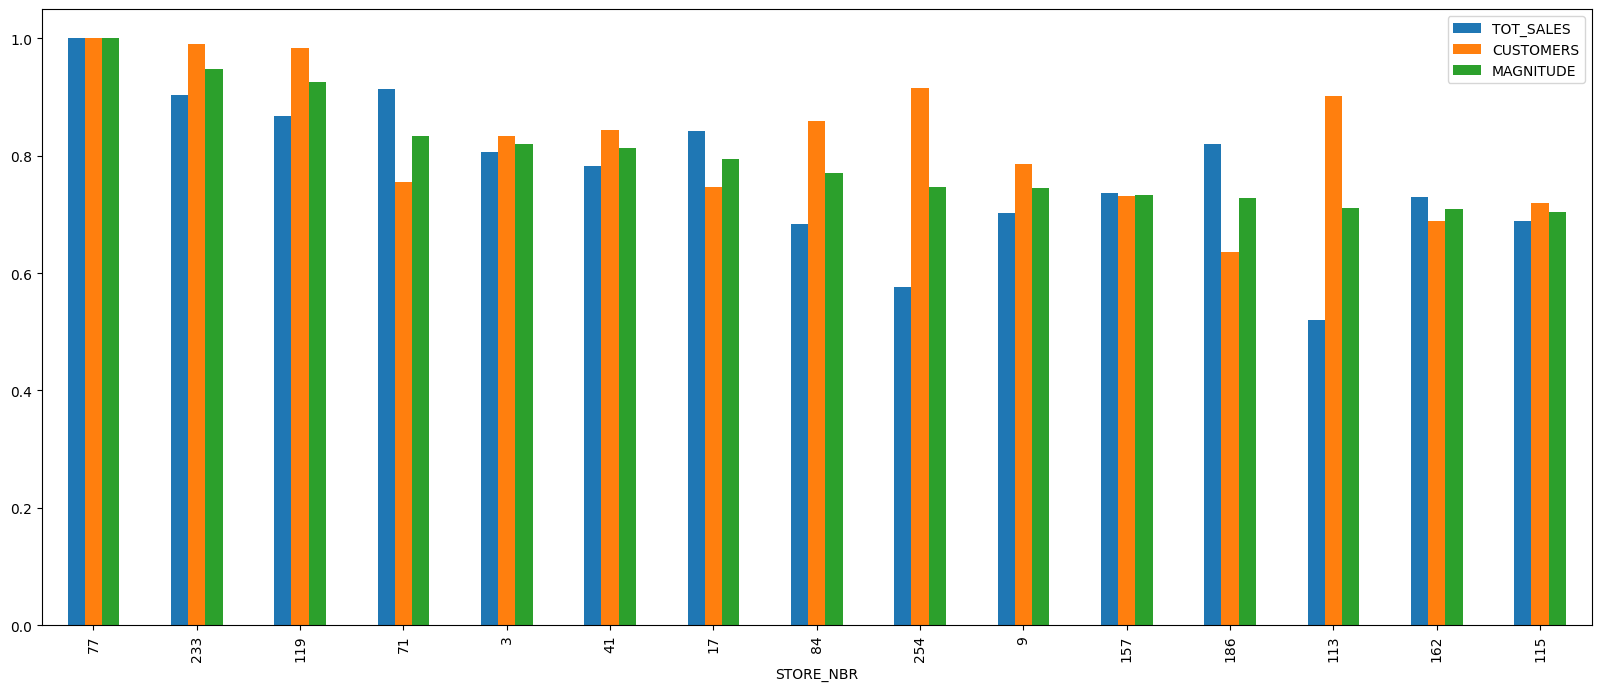

In [21]:
# Store 77 is highly correlated and magnitude with store number 233:

corr77[corr77.MAGNITUDE.abs()>0.7].plot(kind="bar",figsize=(20,8))

<AxesSubplot:ylabel='STORE_NBR'>

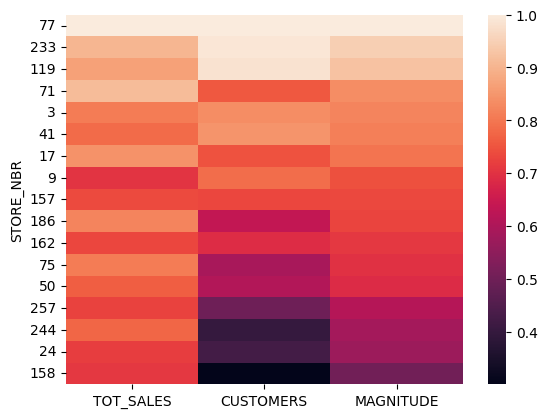

In [22]:
sns.heatmap(data=corr77[corr77.TOT_SALES.abs()>0.7])

In [23]:
# Calculating difference between scaled control sales and trial sales
# Let null hypothesis be that both stores 77 ans 233 have no difference

from scipy.stats import ks_2samp,ttest_ind,t

In [24]:
# difference between control and trial sales
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)
a=[]
for x in df_metrics.columns:
    a.append(ks_2samp(df_metrics.loc[77][x], df_metrics.loc[233][x]))
a=pd.DataFrame(a,index=df_metrics.columns)

In [25]:
a

,statistic,pvalue
TOT_SALES,0.285714,0.962704
CUSTOMERS,0.142857,0.999961
PROD_QTY,0.285714,0.962704
PRICE_PER_UNIT,0.285714,0.962704
CHIP_PER_TXN,0.285714,0.962704
TXN_PER_CUST,0.428571,0.575175


In [26]:

#For pre trial period, since all of the p-values are high (say more than 0.05), 
#we can't reject the null hypothesis


t.ppf(0.95,df=7)

1.894578605061305

"""
Since all of the p-values are high (say more than 0.05), we reject the null hypothesis i.e. there means are significantly different.
We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March and April -
i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store

"""



In [27]:
### STORE 86:
corr86=corrcalc(86)
corr86

,TOT_SALES,CUSTOMERS
STORE_NBR,,
1,0.445632,0.485831
2,-0.403835,-0.086161
3,-0.261284,-0.353786
4,-0.039035,-0.169608
5,0.235159,-0.253229
...,...,...
268,-0.452182,-0.034273
269,0.697055,-0.098587
270,-0.730679,-0.767267


In [28]:
corr86=standardizer(corr86)
corr86

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
1,0.445632,0.485831,0.465731
2,0.403835,0.086161,0.244998
3,0.261284,0.353786,0.307535
4,0.039035,0.169608,0.104322
5,0.235159,0.253229,0.244194
...,...,...,...
268,0.452182,0.034273,0.243228
269,0.697055,0.098587,0.397821
270,0.730679,0.767267,0.748973


In [29]:
corr86=corr86.sort_values(["MAGNITUDE"],ascending=False).dropna()
corr86

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
86,1.000000,1.000000,1.000000
155,0.877882,0.942876,0.910379
23,0.784698,0.943559,0.864128
120,0.872693,0.815097,0.843895
114,0.734415,0.855339,0.794877
...,...,...,...
91,0.019027,0.041271,0.030149
17,0.029793,0.030039,0.029916
131,0.028487,0.031142,0.029815


<AxesSubplot:xlabel='STORE_NBR'>

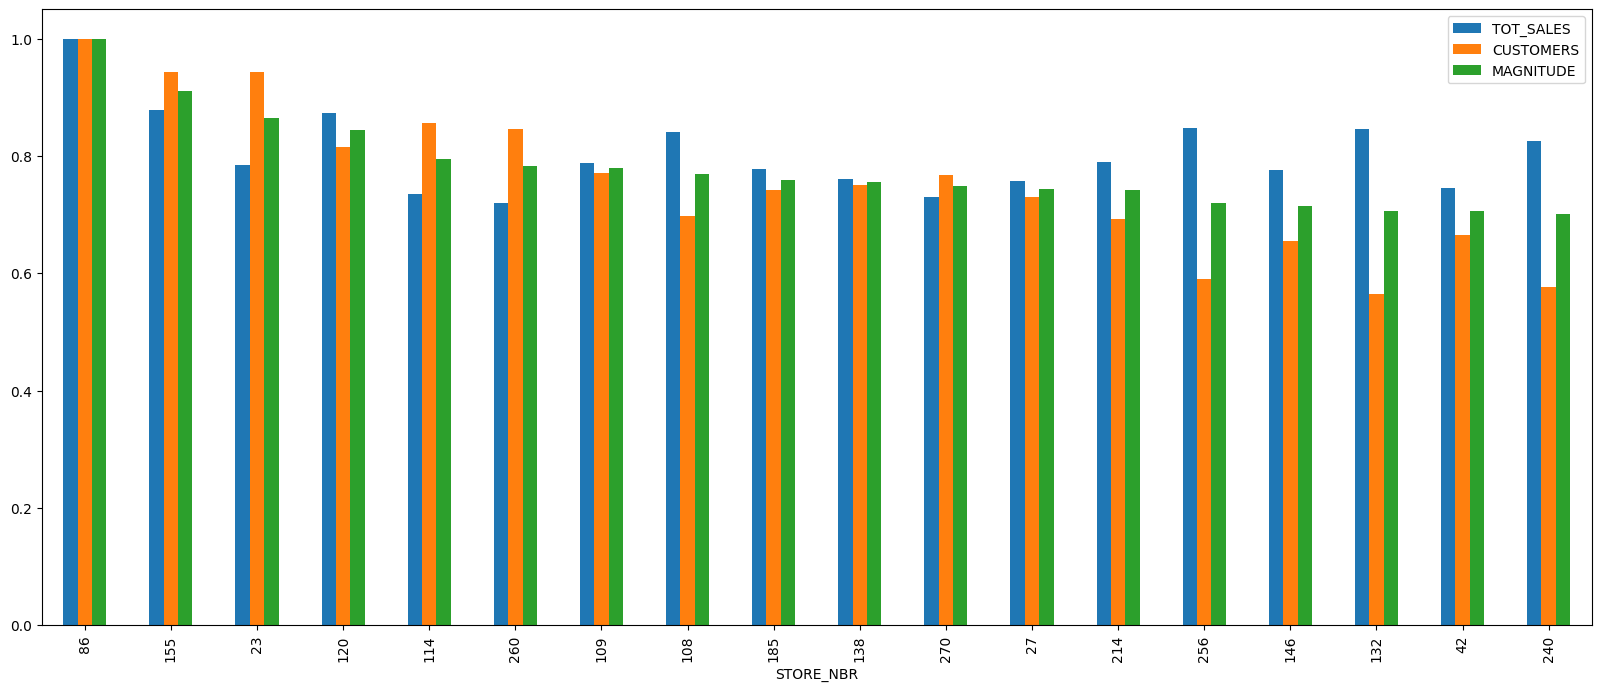

In [30]:
# Store 86 is highly correlated and magnitude with store number 155:

corr86[corr86.MAGNITUDE.abs()>0.7].plot(kind="bar",figsize=(20,8))

<AxesSubplot:ylabel='STORE_NBR'>

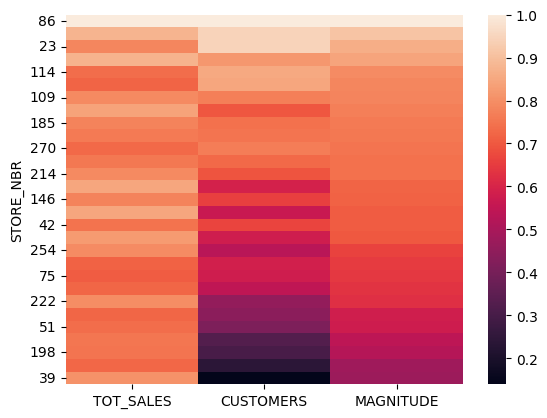

In [31]:
sns.heatmap(data=corr86[corr86.TOT_SALES.abs()>0.7])

In [32]:
# Calculating difference between scaled control sales and trial sales
# Let null hypothesis be that both stores 86 ans 155 have no difference

from scipy.stats import ks_2samp,ttest_ind,t

In [33]:
# difference between control and trial sales
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)
b=[]
for x in df_metrics.columns:
    b.append(ks_2samp(df_metrics.loc[86][x], df_metrics.loc[155][x]))
b=pd.DataFrame(b,index=df_metrics.columns)

In [34]:
b

,statistic,pvalue
TOT_SALES,0.285714,0.962704
CUSTOMERS,0.285714,0.962704
PROD_QTY,0.285714,0.962704
PRICE_PER_UNIT,0.428571,0.575175
CHIP_PER_TXN,0.428571,0.575175
TXN_PER_CUST,0.428571,0.575175


In [35]:
#For pre trial period, since all of the p-values are high (say more than 0.05), 
#we can't reject the null hypothesis
t.ppf(0.95,df=7)

1.894578605061305

In [36]:
# STORE 88

corr88=corrcalc(88)
corr88

,TOT_SALES,CUSTOMERS
STORE_NBR,,
1,0.813636,0.305334
2,-0.067927,-0.452379
3,-0.507847,0.522884
4,-0.745566,-0.361503
5,0.190330,-0.025320
...,...,...
268,-0.021429,0.672672
269,-0.172578,-0.274781
270,-0.723272,-0.103032


In [37]:
corr88=standardizer(corr88)
corr88

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
1,0.813636,0.305334,0.559485
2,0.067927,0.452379,0.260153
3,0.507847,0.522884,0.515365
4,0.745566,0.361503,0.553534
5,0.190330,0.025320,0.107825
...,...,...,...
268,0.021429,0.672672,0.347050
269,0.172578,0.274781,0.223679
270,0.723272,0.103032,0.413152


In [38]:
corr88=corr88.sort_values(["MAGNITUDE"],ascending=False).dropna()
corr88

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
88,1.000000,1.000000,1.000000
178,0.731857,0.939466,0.835661
14,0.698557,0.942976,0.820767
133,0.735407,0.835426,0.785417
204,0.885774,0.550263,0.718018
...,...,...,...
271,0.103037,0.018831,0.060934
177,0.084074,0.005568,0.044821
170,0.027262,0.028583,0.027923


<AxesSubplot:xlabel='STORE_NBR'>

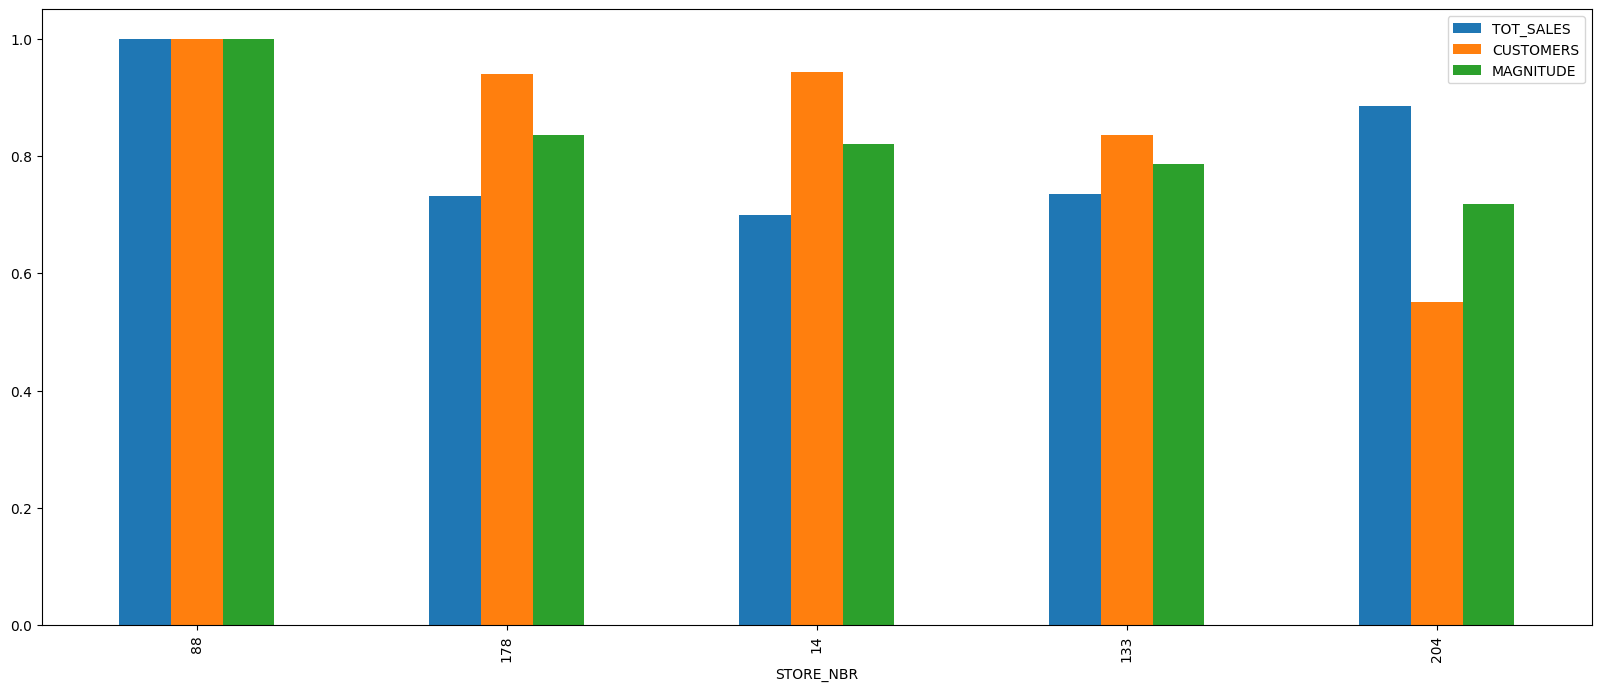

In [39]:
# Store 88 is highly correlated and magnitude with store number 178:

corr88[corr88.MAGNITUDE.abs()>0.7].plot(kind="bar",figsize=(20,8))

<AxesSubplot:ylabel='STORE_NBR'>

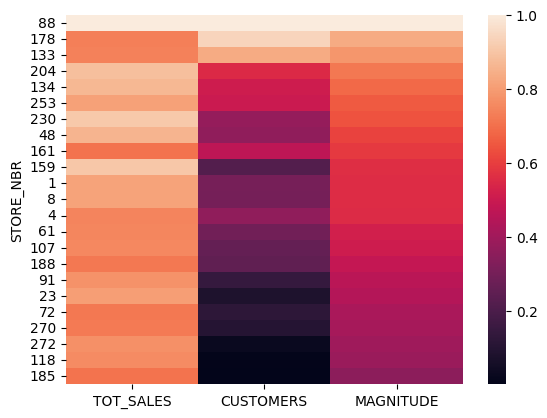

In [40]:
sns.heatmap(data=corr88[corr88.TOT_SALES.abs()>0.7])

In [41]:
# Calculating difference between scaled control sales and trial sales
# Let null hypothesis be that both stores 86 ans 155 have no difference
# difference between control and trial sales
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)
c=[]
for x in df_metrics.columns:
    c.append(ks_2samp(df_metrics.loc[86][x], df_metrics.loc[155][x]))
c=pd.DataFrame(c,index=df_metrics.columns)

In [42]:
c

,statistic,pvalue
TOT_SALES,0.285714,0.962704
CUSTOMERS,0.285714,0.962704
PROD_QTY,0.285714,0.962704
PRICE_PER_UNIT,0.428571,0.575175
CHIP_PER_TXN,0.428571,0.575175
TXN_PER_CUST,0.428571,0.575175


In [43]:
#For pre trial period, since all of the p-values are high (say more than 0.05), 
#we can't reject the null hypothesis
t.ppf(0.95,df=7)

1.894578605061305

Assessment of trial
The trial period goes from the start of February 2019 to April 2019. We now want to see if there has been an uplift in overall chip sales.

Sampling march and april from the 3 months

In [45]:
d=[]
for x in trial.columns:
    d.append(ttest_ind(trial.loc[77][x].tail(2), trial.loc[233][x].tail(2)))
d=pd.DataFrame(d,index=df_metrics.columns)

In [46]:
d

,statistic,pvalue
TOT_SALES,4.267336,0.050769
CUSTOMERS,2.586131,0.122618
PROD_QTY,4.043680,0.056063
PRICE_PER_UNIT,-0.634173,0.590828
CHIP_PER_TXN,1.785126,0.216165
TXN_PER_CUST,0.332434,0.771171


In [48]:
e=[]
for x in trial.columns:
    e.append(ttest_ind(trial.loc[86][x].tail(2), trial.loc[155][x].tail(2)))
e=pd.DataFrame(e,index=df_metrics.columns)

In [49]:
e

,statistic,pvalue
TOT_SALES,1.234512,0.342378
CUSTOMERS,2.414953,0.137076
PROD_QTY,1.862532,0.203568
PRICE_PER_UNIT,0.366214,0.749316
CHIP_PER_TXN,-0.285938,0.801822
TXN_PER_CUST,-1.074767,0.394929


In [50]:
f=[]
for x in trial.columns:
    f.append(ttest_ind(trial.loc[88][x].tail(2), trial.loc[178][x].tail(2)))
f=pd.DataFrame(f,index=df_metrics.columns)

In [51]:
f

,statistic,pvalue
TOT_SALES,11.956124,0.006923
CUSTOMERS,4.621207,0.043774
PROD_QTY,3.668811,0.066922
PRICE_PER_UNIT,16.644482,0.003590
CHIP_PER_TXN,-0.514930,0.657864
TXN_PER_CUST,0.652204,0.581212


The results for trial stores 77 and 88 during the trial period show a significant difference but this is not the case for trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales.